<a href="https://colab.research.google.com/github/Elena-Shabanova/-Python/blob/%D0%92%D0%9A%D0%A0-05.11.2022/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D1%80%D0%BE%D0%BC%D0%B5%D0%B6%D1%83%D1%82%D0%BE%D1%87%D0%BD%D0%BE%D0%B9_%D0%B0%D1%82%D1%82%D0%B5%D1%81%D1%82%D0%B0%D1%86%D0%B8%D0%B82_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Разработать и обучить нейронную сеть на TensorFlow для решения задачи классификации рукописных цифр. Набор данных: MNIST, источник: from keras.datasets import mnist

В нейронной сети должно быть 3 Dense-слоя: два скрытых слоя, состоящих из 128 нейронов каждый, и выходной слой. Активационные функции на скрытых слоях relu, на выходном - softmax.
В качестве ответа необходимо указать количество оптимизируемых параметров (Trainable params) в виде целого числа
и прикрепить к ответу подробное решение с кодом в виде файла или архива с файлами.


In [1]:
# Импорт модулей и зависимостей
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt # Надо для проверки - картинки с циферками выводить
from keras.datasets import mnist # Импорт набора данных. Набор данных: MNIST

In [2]:
# Импорт данных 
# Загрузка обучающий и тестовый наборы с помощью функции load_data(), предварительно перемешанных данных MNIST в наборы trains и tests
mnist = tf.keras.datasets.mnist
(x_train,y_train) , (x_test,y_test) = mnist.load_data() 
# и их нормализация  по стобцам
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


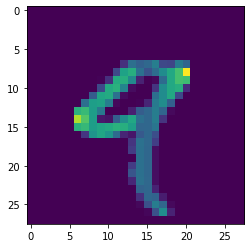

In [3]:
# Форма набора данных
print(x_train.shape)
# Вывод изображения номер ребенок сказал, т.е. любую для примера
#plt.imshow(x_train[4],cmap=plt.cm.binary)
plt.imshow(x_train[4]) # Пусть цветная девятка будет, только для красоты, не более. Качество здесь не нужно

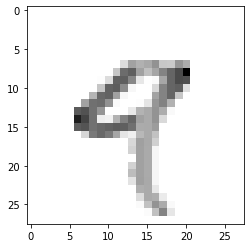

In [4]:
# Еще способ посмотреть данные через функцию, но метод тот же plt.imshow()
def draw(n):
    plt.imshow(n,cmap=plt.cm.binary) # переведем сразу в черно-белое изображение (бинарное) 
    plt.show()
     
draw(x_train[4])

In [5]:
# Процесс создания нейронной сети в соответтсвии с условием задачи и её обучение
# Используем модель Sequential, последовательная модель подходит для простого стека слоев: каждый слой имеет ровно один тензор входной и один выходной тензор
model = tf.keras.models.Sequential()
 
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) # Множество изображений цифр размером 28х28 пикселей
# В нейронной сети должно быть 3 Dense-слоя: два скрытых слоя, состоящих из 128 нейронов каждый, и выходной слой
# Активационные функции на скрытых слоях relu, на выходном - softmax
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu, name="layer1")) 
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu, name="layer2"))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax, name="output_layer"))
 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2644 - accuracy: 0.9228
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1071 - accuracy: 0.9670
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0716 - accuracy: 0.9775


In [6]:
# Проверка точности модели и потери
val_loss,val_acc = model.evaluate(x_test,y_test)
print("loss-> ",val_loss,"\nacc-> ",val_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.0857 - accuracy: 0.9720
loss->  0.08574219793081284 
acc->  0.972000002861023


313/313 [==============================] - 1s 2ms/step
label ->  7
prediction ->  7


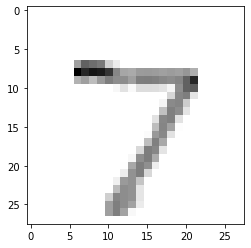

In [7]:
# Прогнозирование с использованием модели
predictions=model.predict([x_test])
print('label -> ',y_test[0])
print('prediction -> ',np.argmax(predictions[0]))
 
draw(x_test[0])

In [8]:
# Cохранение модели
model.save('recognition_of_handwritten_digits.model')# сохранение на Google_диск

313/313 [==============================] - 1s 2ms/step
label ->  1
prediction ->  1


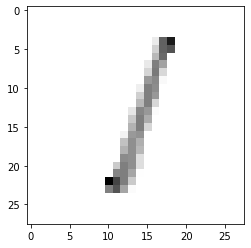

In [9]:
# Прогнозирование с использованием новой модели
predictions = model.predict([x_test])
 
 
print('label -> ',y_test[2])
print('prediction -> ',np.argmax(predictions[2]))
 
draw(x_test[2])

In [10]:
# Оценка качества работы обученной нейронной сети на тестовой выборке
y = model(x_test)
y2 = tf.argmax(y, axis=1).numpy()
acc = tf.metrics.Accuracy()
acc.update_state(y_test, y2)
print(acc.result().numpy() * 100 )

97.2000002861023


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 layer2 (Dense)              (None, 128)               16512     
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________



Количество параметров равно 118 282

Задача 21

In [14]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [15]:
# Считать данные из файла dataset.cvs. Не забыть загрузить на Goolle-диск
data = pd.read_csv('/content/drive/MyDrive/dataset.csv', encoding='utf-8', delimiter = ',', quoting=3) # Загрузка датасета
data.sample(5) # Вывод пяти случайных строк датафрейма

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
"""531",1,2,"""""Quick","Miss. Phyllis May""""",female,2.0,1,1,26360,26.00,NaN,"S"""
"""377",1,3,"""""Landergren","Miss. Aurora Adelia""""",female,22.0,0,0,C 7077,7.25,NaN,"S"""
"""888",1,1,"""""Graham","Miss. Margaret Edith""""",female,19.0,0,0,112053,30.00,B42,"S"""
"""652",1,2,"""""Doling","Miss. Elsie""""",female,18.0,0,1,231919,23.00,NaN,"S"""
"""283",0,3,"""""de Pelsmaeker","Mr. Alfons""""",male,16.0,0,0,345778,9.50,NaN,"S"""


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, "1 to "891
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 90.5+ KB


In [17]:
# Из исходного набора данных оставить колонки: Survived, Sex, Age, SibSp, Parch, Fare
data = data.drop(columns=['PassengerId', 'Pclass', 'Name', 'Ticket', 'Cabin', 'Embarked'], errors='ignore') # Удаление столбцов
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, "1 to "891
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 48.7+ KB


In [18]:
# Функция для вычисления пропущенных значений по столбцу
def missing_values_table(dt):
  mis_val = dt.isnull().sum() # Общее количество пропущенных значений
  mis_val_percent = 100 * dt.isnull().sum() / len(data) # Процент пропущенных значений
  # Сформируем таблицу с результатами
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
  mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Пропущенные значения', 1 : '% от общего числа значений'})# Переименование столбцов
  # Сортировка таблицы по проценту пропущенных элементов по убыванию
  mis_val_table_ren_columns = mis_val_table_ren_columns[
                              mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
                              '% от общего числа значений', ascending=False).round(1)
  # Вывод сводной информации
  print ("Выбранный фрейм данных содержит " + str(dt.shape[1]) + " стобца(ов).\n"      
            "Есть " + str(mis_val_table_ren_columns.shape[0]) +
              " столбцы(ов), в которых отсутствуют значения.")
        
  return mis_val_table_ren_columns      # Возврат фрейма данных (таблички) с отсутствующей информацией   

In [19]:
missing_values_table(data)

Выбранный фрейм данных содержит 6 стобца(ов).
Есть 1 столбцы(ов), в которых отсутствуют значения.


,Пропущенные значения,% от общего числа значений
Age,177,19.9


In [ ]:
data.head(5) # Вывод пяти строк датафрейма. Может быть и незачем, но пустоты в Age показывает

,Survived,Sex,Age,SibSp,Parch,Fare
"""1",3,male,22.0,1,0,7.2500
"""2",1,female,38.0,1,0,71.2833
"""3",3,female,26.0,0,0,7.9250
"""4",1,female,35.0,1,0,53.1000
"""5",3,male,35.0,0,0,8.0500


In [20]:
# Удалить все записи, где есть хотя бы один пропуск. Здесь полько колонка Пол соответствует требованию - содержит пустоты
data = data.drop(columns=['Age'], errors='ignore') # Удаление столбца, содержащего пустоты
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, "1 to "891
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 41.8+ KB


In [21]:
# Закодировать колонку Sex с помощью LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data.head(5) # Вывод пяти строк датафрейма. Проверка как LabelEncoder закодировал колонку Пол 

,Survived,Sex,SibSp,Parch,Fare
"""1",3,1,1,0,7.2500
"""2",1,0,1,0,71.2833
"""3",3,0,0,0,7.9250
"""4",1,0,1,0,53.1000
"""5",3,1,0,0,8.0500


Пол закодирован следующим образом: мужчина - 1, а женщина - 0

In [ ]:
#scaler = preprocessing.MinMaxScaler(feature_range=(0, 2)) # Нормализация в диапазоне от 0 до 2
#names = data.columns
#d = scaler.fit_transform(data)
#scaled_data = pd.DataFrame(d, columns=names) 
#scaled_data.head()

,Survived,Sex,SibSp,Parch,Fare
0,2.0,2.0,0.25,0.0,0.028302
1,0.0,0.0,0.25,0.0,0.278271
2,2.0,0.0,0.00,0.0,0.030937
3,0.0,0.0,0.25,0.0,0.207289
4,2.0,2.0,0.00,0.0,0.031425


In [22]:
# Провести нормализацию всех колонок датасета с помощью MinMaxScaler (диапазон не указан)
scaler = preprocessing.MinMaxScaler() # Нормализация в диапазоне от 0 до 1
names = data.columns
d = scaler.fit_transform(data)
scaled_data = pd.DataFrame(d, columns=names) 
scaled_data.head()

,Survived,Sex,SibSp,Parch,Fare
0,1.0,1.0,0.125,0.0,0.014151
1,0.0,0.0,0.125,0.0,0.139136
2,1.0,0.0,0.000,0.0,0.015469
3,0.0,0.0,0.125,0.0,0.103644
4,1.0,1.0,0.000,0.0,0.015713


In [23]:
# Провести стандартизацию всех колонок датасета с помощью StandardScaler
from sklearn.preprocessing import StandardScaler
# Определение стандартного масштабатора
scaler = StandardScaler()
# Преобразование данных, т.е. стандартизация
data= scaler.fit_transform(data)
print(data)

[[ 0.82737724  0.73769513  0.43279337 -0.47367361 -0.50244517]
 [-1.56610693 -1.35557354  0.43279337 -0.47367361  0.78684529]
 [ 0.82737724 -1.35557354 -0.4745452  -0.47367361 -0.48885426]
 ...
 [ 0.82737724 -1.35557354  0.43279337  2.00893337 -0.17626324]
 [-1.56610693  0.73769513 -0.4745452  -0.47367361 -0.04438104]
 [ 0.82737724  0.73769513 -0.4745452  -0.47367361 -0.49237783]]


In [24]:
# Найти: Сумму элементов нормализованного датасета (округлить до целого числа и вписать в поле для ответа).
#import numpy as np
summa_standart = np.sum(data)
print(summa_standart)
print('Ответ: ', np.round(summa_standart)) 
print(round(summa_standart))


-9.592326932761353e-14
Ответ:  -0.0
0
